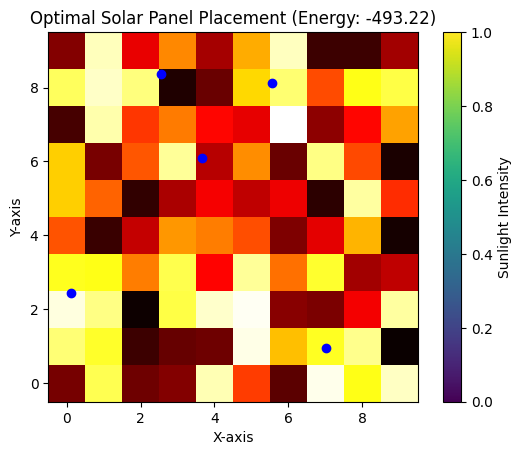

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_rooftop(grid_size, sunlight_map):
    return np.random.uniform(low=0.5, high=1.5, size=grid_size) * sunlight_map

def solar_fitness(panel_positions, sunlight_map, cost_per_panel=100, shading_penalty=1000):
    total_energy = 0
    shading_penalty_cost = 0
    num_panels = len(panel_positions)

    for i, pos in enumerate(panel_positions):
        x, y = int(pos[0]), int(pos[1])
        total_energy += sunlight_map[x, y]

        for j, other_pos in enumerate(panel_positions):
            if i != j and np.linalg.norm(np.array(pos) - np.array(other_pos)) < 2:
                shading_penalty_cost += shading_penalty

    fitness = -total_energy + shading_penalty_cost + (num_panels * cost_per_panel)
    return fitness

def grey_wolf_solar_placement(grid_size, sunlight_map, n_wolves, n_iterations, n_panels):
    wolves = np.random.uniform(low=0, high=grid_size[0], size=(n_wolves, n_panels, 2))
    alpha, beta, delta = np.inf, np.inf, np.inf
    alpha_pos, beta_pos, delta_pos = None, None, None

    for _ in range(n_iterations):
        fitness = [solar_fitness(wolf.astype(int), sunlight_map) for wolf in wolves]
        fitness = np.array(fitness)

        for i, fit in enumerate(fitness):
            if fit < alpha:
                delta, beta, alpha = beta, alpha, fit
                delta_pos, beta_pos, alpha_pos = beta_pos, alpha_pos, wolves[i].copy()
            elif fit < beta:
                delta, beta = beta, fit
                delta_pos, beta_pos = beta_pos, wolves[i].copy()
            elif fit < delta:
                delta = fit
                delta_pos = wolves[i].copy()

        a = 2 - 2 * (_ / n_iterations)
        for i in range(n_wolves):
            for j in range(n_panels):
                for d in range(2):
                    r1, r2 = np.random.rand(), np.random.rand()
                    A1, C1 = 2 * a * r1 - a, 2 * r2
                    D_alpha = abs(C1 * alpha_pos[j][d] - wolves[i][j][d])
                    X1 = alpha_pos[j][d] - A1 * D_alpha

                    r1, r2 = np.random.rand(), np.random.rand()
                    A2, C2 = 2 * a * r1 - a, 2 * r2
                    D_beta = abs(C2 * beta_pos[j][d] - wolves[i][j][d])
                    X2 = beta_pos[j][d] - A2 * D_beta

                    r1, r2 = np.random.rand(), np.random.rand()
                    A3, C3 = 2 * a * r1 - a, 2 * r2
                    D_delta = abs(C3 * delta_pos[j][d] - wolves[i][j][d])
                    X3 = delta_pos[j][d] - A3 * D_delta

                    wolves[i][j][d] = (X1 + X2 + X3) / 3

                wolves[i][j] = np.clip(wolves[i][j], 0, grid_size[0] - 1)

    return alpha_pos, -alpha

if __name__ == "__main__":
    grid_size = (10, 10)
    sunlight_map = create_rooftop(grid_size, np.ones(grid_size))
    n_wolves = 10
    n_iterations = 20
    n_panels = 5

    best_positions, best_energy = grey_wolf_solar_placement(grid_size, sunlight_map, n_wolves, n_iterations, n_panels)

    plt.imshow(sunlight_map, cmap="hot", origin="lower")
    for pos in best_positions:
        plt.scatter(pos[1], pos[0], c="blue", marker="o")
    plt.title(f"Optimal Solar Panel Placement (Energy: {best_energy:.2f})")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.colorbar(label="Sunlight Intensity")
    plt.show()
